In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
### : Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 mins 02 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,27 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ggh839
H2O cluster total nodes:,1
H2O cluster free memory:,3.228 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status(True)

H2O cluster uptime:,22 mins 02 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,27 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ggh839
H2O cluster total nodes:,1
H2O cluster free memory:,3.228 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Nodes info:,Node 1
h2o,localhost/127.0.0.1:54321
healthy,True
last_ping,1510940188698.0000000
num_cpus,8
sys_load,1.6425781
mem_value_size,29662208
free_mem,3466219520.0000000
pojo_mem,321982464
swap_mem,0
free_disk,223606734848.0000000


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("/Users/avkashchauhan/src/github.com/avkash/mldl/data/auto_mpg.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:398
Cols:8




,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
type,int,real,int,int,real,int,int,real
mins,3.0,68.0,46.0,1613.0,8.0,70.0,1.0,9.0
mean,5.45477386935,193.425879397,104.469387755,2970.42462312,15.5680904523,76.0100502513,1.57286432161,23.5145728643
maxs,8.0,455.0,230.0,5140.0,24.8,82.0,3.0,46.6
sigma,1.70100424453,104.269838171,38.4911599328,846.841774197,2.75768892981,3.69762664673,0.802054877727,7.81598431257
zeros,0,0,0,0,0,0,0,0
missing,0,0,6,0,0,0,0,0
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,18.0


In [11]:
###: Getting a list of columns in our dataset

In [12]:
df.col_names

[u'cylinders',
 u'displacement',
 u'horsepower',
 u'weight',
 u'acceleration',
 u'modelyear',
 u'origin',
 u'mpg']

In [13]:
###: Understanding Dataset with pylab library

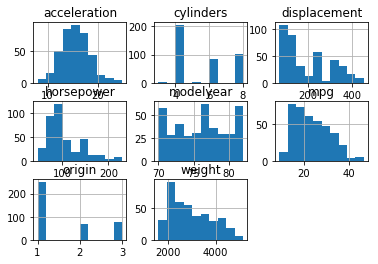

In [14]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [15]:
###: Understanding Dataset with Seaborn python library using origin as color hue

/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


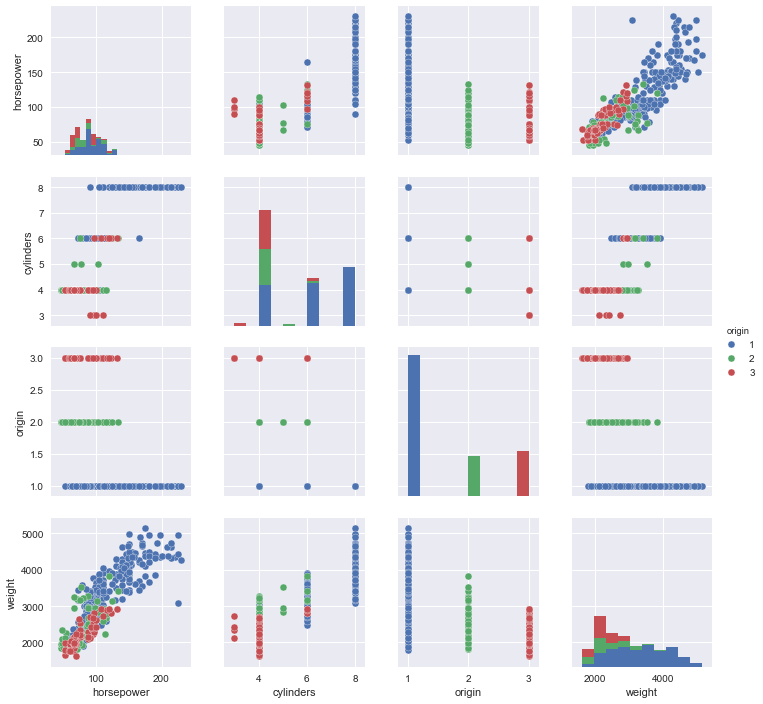

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns
sns.set_context("notebook")

sns.pairplot(df.as_data_frame(), vars=["horsepower" , "cylinders", "origin", "weight"], hue="origin");
plt.show()

In [17]:
###: Getting the list of classes in the response column ()

In [18]:
df['cylinders'].asfactor().levels()

[['3', '4', '5', '6', '8']]

In [19]:
###: Understanding Dataset with Seaborn python library using cylinders as color hue

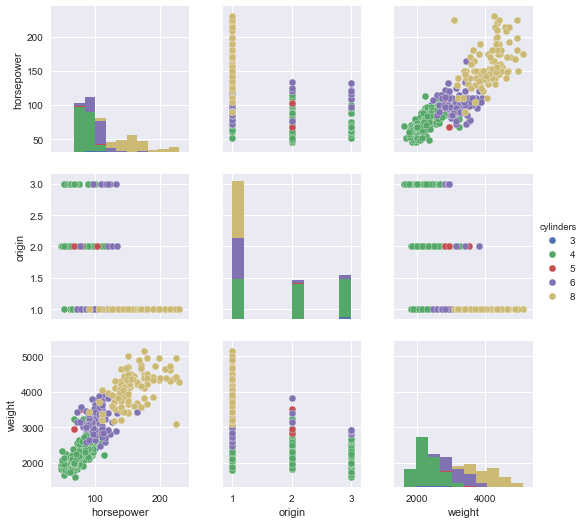

In [20]:
sns.pairplot(df.as_data_frame(), vars=["horsepower" , "origin", "weight"], hue="cylinders");
plt.show()

In [21]:
###: Setting Response column

In [22]:
response = "mpg"

In [23]:
###: Setting all columns/features into a local variable

In [24]:
features = df.col_names

In [25]:
###: Settings all features for model building

In [26]:
features.remove(response)
print(features)

[u'cylinders', u'displacement', u'horsepower', u'weight', u'acceleration', u'modelyear', u'origin']


In [27]:
###: Importing H2O Distributed Random Forest library

In [28]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [29]:
###: Setting H2O Distributed Random Forest model configuration (default)

In [30]:
drf_auto_basic = H2ORandomForestEstimator()

In [31]:
###: Training H2O Distributed Random Forest Model 

In [32]:
drf_auto_basic.train(x = features, y = response, training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [33]:
###: Understanding H2O Distributed Random Forest Model

In [34]:
drf_auto_basic

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1510938866462_2945


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 7.94382146831
RMSE: 2.81847857333
MAE: 1.95930709571
RMSLE: 0.107692073906
Mean Residual Deviance: 7.94382146831
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-11-17 09:36:37,0.000 sec,0.0,nan,nan,nan
,2017-11-17 09:36:37,0.017 sec,1.0,3.9404640,2.7493055,15.5272563
,2017-11-17 09:36:37,0.019 sec,2.0,4.2933597,2.8320436,18.4329376
,2017-11-17 09:36:37,0.022 sec,3.0,4.1052659,2.6807650,16.8532078
,2017-11-17 09:36:37,0.025 sec,4.0,4.0015242,2.6359140,16.0121961
---,---,---,---,---,---,---
,2017-11-17 09:36:37,0.165 sec,46.0,2.8310031,1.9726362,8.0145786
,2017-11-17 09:36:37,0.168 sec,47.0,2.8346121,1.9747831,8.0350259
,2017-11-17 09:36:37,0.171 sec,48.0,2.8343802,1.9720317,8.0337111
,2017-11-17 09:36:37,0.174 sec,49.0,2.8279683,1.9686920,7.9974047



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
displacement,254471.3281250,1.0,0.2531211
cylinders,232369.7031250,0.9131469,0.2311368
weight,214117.2031250,0.8414198,0.2129811
modelyear,123997.0156250,0.4872730,0.1233391
horsepower,120871.4609380,0.4749905,0.1202301
acceleration,33237.8789062,0.1306154,0.0330615
origin,26269.6152344,0.1032321,0.0261302


In [35]:
###: Understanding H2O Distributed Random Forest Model overall performance based on training data

In [36]:
drf_auto_basic.model_performance(train=True)


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 7.94382146831
RMSE: 2.81847857333
MAE: 1.95930709571
RMSLE: 0.107692073906
Mean Residual Deviance: 7.94382146831


In [37]:
###: Understanding H2O Distributed Random Forest Model - r2 Model metrics based on training data

In [38]:
drf_auto_basic.model_performance(train=True).r2()

0.8696368975136602

In [39]:
###: Setting H2O Distributed Random Forest model configuration to use cross validation with 5 folds

In [40]:
drf_auto_cv = H2ORandomForestEstimator(nfolds = 5)

In [41]:
###: Training H2O Distributed Random Forest Model 

In [42]:
drf_auto_cv.train(x = features, y = response, training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
drf_auto_cv

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1510938866462_2946


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 8.11608679755
RMSE: 2.84887465459
MAE: 2.00881205659
RMSLE: 0.108418945751
Mean Residual Deviance: 8.11608679755

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 7.21456378497
RMSE: 2.68599400315
MAE: 1.87661373215
RMSLE: 0.10311882912
Mean Residual Deviance: 7.21456378497
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.8823913,0.0975172,2.1086888,1.7855054,1.8851272,1.9298064,1.7028285
mean_residual_deviance,7.229416,0.8418353,8.297349,8.269222,7.4222226,7.123596,5.034691
mse,7.229416,0.8418353,8.297349,8.269222,7.4222226,7.123596,5.034691
r2,0.8799374,0.0166533,0.8661203,0.8510977,0.8743213,0.8874303,0.9207175
residual_deviance,7.229416,0.8418353,8.297349,8.269222,7.4222226,7.123596,5.034691
rmse,2.6786664,0.1645648,2.8805118,2.8756256,2.7243757,2.6690066,2.2438116
rmsle,0.1030379,0.0064223,0.1159096,0.1019539,0.1089966,0.0992945,0.0890347


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-11-17 09:36:43,0.263 sec,0.0,nan,nan,nan
,2017-11-17 09:36:43,0.265 sec,1.0,4.1252799,2.7948387,17.0179345
,2017-11-17 09:36:43,0.267 sec,2.0,4.2812197,2.8687243,18.3288417
,2017-11-17 09:36:43,0.270 sec,3.0,4.0743863,2.6550798,16.6006237
,2017-11-17 09:36:43,0.272 sec,4.0,3.9750544,2.6270914,15.8010574
---,---,---,---,---,---,---
,2017-11-17 09:36:44,0.385 sec,46.0,2.8878042,2.0295902,8.3394133
,2017-11-17 09:36:44,0.387 sec,47.0,2.8662435,2.0219617,8.2153518
,2017-11-17 09:36:44,0.390 sec,48.0,2.8649470,2.0217015,8.2079216
,2017-11-17 09:36:44,0.393 sec,49.0,2.8627101,2.0159832,8.1951092



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
displacement,277565.7187500,1.0,0.2805568
weight,183121.8281250,0.6597422,0.1850951
horsepower,174312.9218750,0.6280059,0.1761913
cylinders,150173.4843750,0.5410376,0.1517917
modelyear,149632.5,0.5390885,0.1512449
acceleration,33425.8085938,0.1204248,0.0337860
origin,21106.6660156,0.0760420,0.0213341


In [44]:
###: Understanding H2O Distributed Random Forest Model overall performance based on training data (r2 only)

In [45]:
drf_auto_cv.model_performance(train=True).r2()

0.8668099152028861

In [46]:
###: Understanding H2O Distributed Random Forest Model overall performance based on cross validation data (r2 only)

In [47]:
drf_auto_cv.model_performance(xval=True).r2()

0.8816044743897974

In [48]:
###: Understanding H2O Distributed Random Forest Model scoring History

In [49]:
drf_auto_cv.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2017-11-17 09:36:43,0.263 sec,0.0,NaN,NaN,NaN
1,,2017-11-17 09:36:43,0.265 sec,1.0,4.125280,2.794839,17.017934
2,,2017-11-17 09:36:43,0.267 sec,2.0,4.281220,2.868724,18.328842
3,,2017-11-17 09:36:43,0.270 sec,3.0,4.074386,2.655080,16.600624
4,,2017-11-17 09:36:43,0.272 sec,4.0,3.975054,2.627091,15.801057
5,,2017-11-17 09:36:43,0.275 sec,5.0,3.931932,2.664318,15.460088
6,,2017-11-17 09:36:43,0.278 sec,6.0,3.769625,2.597292,14.210070
7,,2017-11-17 09:36:43,0.281 sec,7.0,3.771280,2.567033,14.222551
8,,2017-11-17 09:36:43,0.283 sec,8.0,3.599448,2.449148,12.956025
9,,2017-11-17 09:36:43,0.286 sec,9.0,3.547222,2.425793,12.582782


In [50]:
###: Understanding H2O Distributed Random Forest Model variable importance

In [51]:
drf_auto_cv.varimp()

[(u'displacement', 277565.71875, 1.0, 0.2805567545852425),
 (u'weight', 183121.828125, 0.6597422367202902, 0.18509514079705341),
 (u'horsepower', 174312.921875, 0.6280059463395099, 0.17619131016524683),
 (u'cylinders', 150173.484375, 0.5410375786004733, 0.15179174716080684),
 (u'modelyear', 149632.5, 0.5390885469353373, 0.1512449331622524),
 (u'acceleration', 33425.80859375, 0.12042484476930745, 0.033786003619908515),
 (u'origin', 21106.666015625, 0.07604204910706394, 0.021334110509489496)]

In [52]:
###: Generating H2O Distributed Random Forest Model variable importance plot

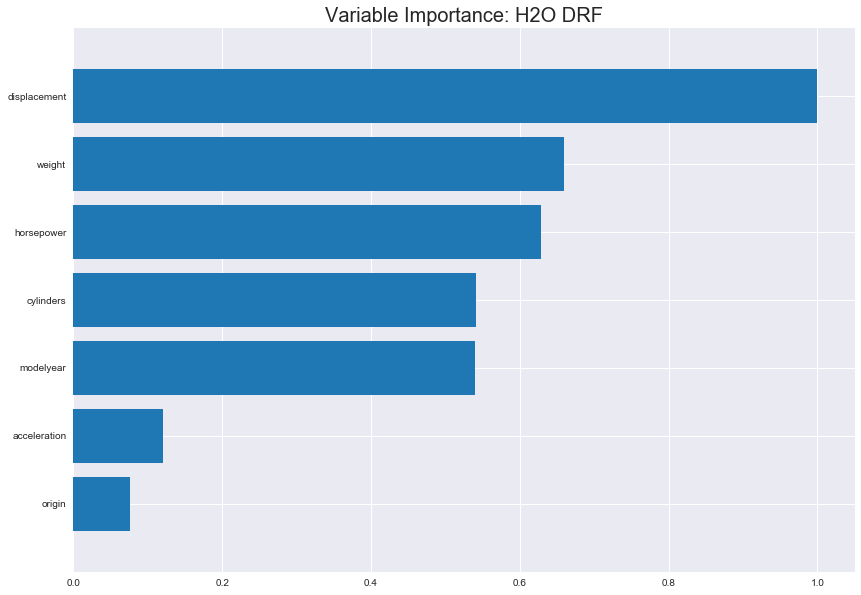

In [53]:
drf_auto_cv.varimp_plot()

In [54]:
###: Setting H2O Distributed Random Forest model configuration to use cross validation with 5 folds and various other parameters
###: for tuning the performance and accuracy

In [55]:
drf_auto_cv_tuned = H2ORandomForestEstimator(nfolds = 5,
                                    ntrees=10,
                                    max_depth=3,
                                    min_rows=2,
                                    keep_cross_validation_predictions=True,
                                    seed=1234)

In [56]:
###: Training H2O Distributed Random Forest Model 

In [57]:
drf_auto_cv_tuned.train(x = features , y = response, training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [58]:
###: Understanding H2O Distributed Random Forest Model overall performance based on cross validation data (r2 only)

In [59]:
drf_auto_cv_tuned.model_performance(xval=True).r2()

0.8083680407605734

In [60]:
###: Plotting H2O Distributed Random Forest Model performance based on mae metric

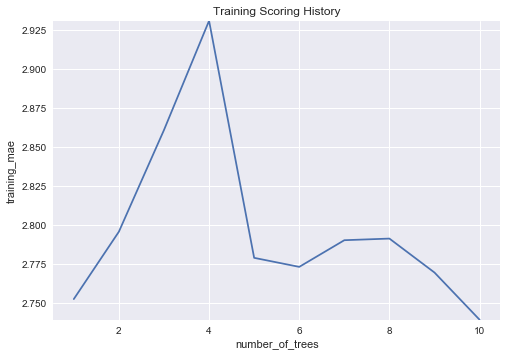

In [61]:
drf_auto_cv_tuned.plot(metric="mae")

In [62]:
###: Plotting H2O Distributed Random Forest Model performance based on rmse metric

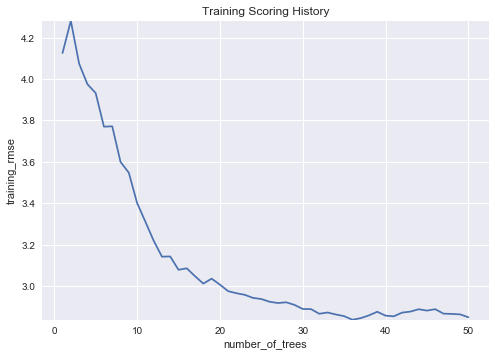

In [63]:
drf_auto_cv.plot(metric='rmse')

In [64]:
###: Plotting H2O Distributed Random Forest Model variable importance plot

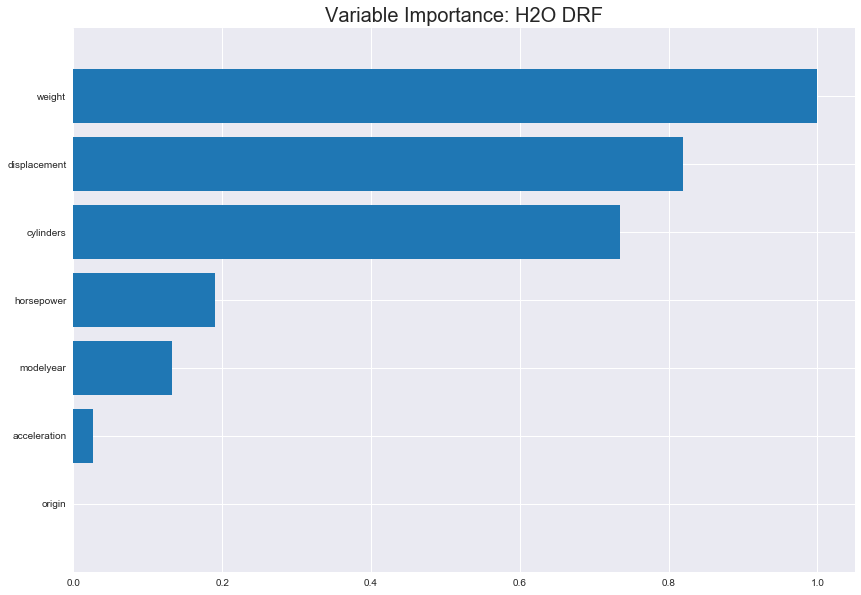

In [65]:
drf_auto_cv_tuned.varimp_plot()

In [66]:
###: Comparing H2O Distributed Random Forest Model performance based on tuned and default cross validation model

In [67]:
print(drf_auto_cv_tuned.model_performance(xval=True).r2())
print(drf_auto_cv_tuned.model_performance(train=True).r2())

0.808368040761
0.77555688188


In [68]:
### PERFORMING PREDICTIONS USING a TEST DATA SET

In [69]:
###: listing first 3 rows from the original data set

In [70]:
df.head(3)

cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
8,307,130,3504,12,70,1,18
8,350,165,3693,11.5,70,1,15
8,318,150,3436,11,70,1,18


In [71]:
###: listing original data set columns

In [72]:
df.columns_by_type()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [73]:
###: creating test data set based on features used for building model

In [74]:
df_test = h2o.H2OFrame.from_python({"cylinders":11, "displacement" : 400, "horsepower" : 400, 
                                    "weight" : 2000, "acceleration" : 14, "modelyear" : 90,
                                   "origin" : 2})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
###: Performing prediction using one of the best Distributed Random Forest model we built earlier

In [76]:
drf_auto_cv_tuned.predict(df_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
23.9658
